# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [73]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import scipy.stats as st
import json
from citipy import citipy
from config import weather_api_key
# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

#URL

units = "imperial"
url = f"http://api.openweathermap.org/data/2.5/weather?appid={weather_api_key}&units={units}&q="


## Generate Cities List

In [60]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

618

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [61]:
city_list = []
country_list = []
cloudiness_list = []
date_list = []
humidity_list = []
lat = []
lng = []
max_temp_list = []
wind_speed_list = []

count = 1

print("Beginning Data Retrieval ")
print("-----------------------------")

for city in cities:  
    
    try: 
        response = requests.get(f"{url}{city}").json() 
        city_list.append(response["name"])
        country_list.append(response["sys"]["country"])
        cloudiness_list.append(response["clouds"]["all"])
        date_list.append(response["dt"])
        humidity_list.append(response["main"]["humidity"])
        lat.append(response["coord"]["lat"])
        lng.append(response["coord"]["lon"])
        max_temp_list.append(response["main"]["temp_max"])
        wind_speed_list.append(response["wind"]["speed"])
        city_name = response["name"]
        
        print(f"Processing Record {count} : {city_name}")
        count= count + 1
               
    except:
        print("City not found. Skipping...")
    continue
    
print("-----------------------------")
print("Data Retrieval Complete")
print("-----------------------------")

Beginning Data Retrieval 
-----------------------------
Processing Record 1 : Kutum
Processing Record 2 : Los Aquijes
Processing Record 3 : Touros
Processing Record 4 : Christchurch
Processing Record 5 : Kenai
Processing Record 6 : Kaélé
Processing Record 7 : Saskylakh
Processing Record 8 : Albany
Processing Record 9 : Cape Town
Processing Record 10 : Rikitea
Processing Record 11 : Paita
Processing Record 12 : Chara
Processing Record 13 : Malokaterynivka
Processing Record 14 : Zhigansk
Processing Record 15 : Lompoc
Processing Record 16 : Port Elizabeth
Processing Record 17 : Ahipara
Processing Record 18 : Ballitoville
Processing Record 19 : New Norfolk
Processing Record 20 : Luganville
City not found. Skipping...
Processing Record 21 : Esso
Processing Record 22 : Natchez
Processing Record 23 : Omboué
Processing Record 24 : Yellowknife
Processing Record 25 : Hithadhoo
Processing Record 26 : Punta Arenas
Processing Record 27 : Mataura
Processing Record 28 : Montepuez
City not found. Skip

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [62]:
weather_dict = pd.DataFrame({ 
                "City" : city_list,
                "Cloudiness" : cloudiness_list,
                "Country" : country_list,
                "Date" : date_list,
                "Humidity" : humidity_list,
                "Lat" : lat,
                "Lng" : lng,
                "Max Temp" : max_temp_list,
                "Wind Speed" : wind_speed_list
})

In [63]:
weather_dict.count()

City          564
Cloudiness    564
Country       564
Date          564
Humidity      564
Lat           564
Lng           564
Max Temp      564
Wind Speed    564
dtype: int64

In [64]:
weather_dict.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Kutum,100,SD,1651978290,12,14.2000,24.6667,70.39,5.53
1,Los Aquijes,8,PE,1651978290,73,-14.0967,-75.6908,67.96,3.71
2,Touros,100,BR,1651978291,88,-5.1989,-35.4608,76.57,8.10
3,Christchurch,100,NZ,1651978272,70,-43.5333,172.6333,69.42,16.11
4,Kenai,0,US,1651978292,57,60.5544,-151.2583,57.02,11.50


In [65]:
weather_dict.to_csv("../output_data/cities.csv", index = False, header=True)

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

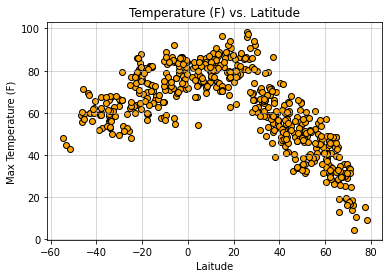

In [66]:
plt.scatter(weather_dict["Lat"], weather_dict["Max Temp"], facecolor = "orange", edgecolor = "black")
plt.title("Temperature (F) vs. Latitude")
plt.xlabel("Laitude")
plt.ylabel("Max Temperature (F)")
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)


plt.savefig("../Images/City Latitude vs Max Temperature.png")


## Latitude vs. Humidity Plot

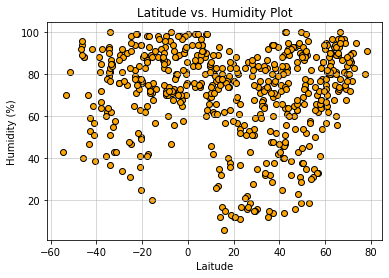

In [67]:
plt.scatter(weather_dict["Lat"], weather_dict["Humidity"], facecolor = "orange", edgecolor = "black")
plt.title("Latitude vs. Humidity Plot")
plt.xlabel("Laitude")
plt.ylabel("Humidity (%)")
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)


plt.savefig("../Images/City Latitude vs Max Temperature.png")

## Latitude vs. Cloudiness Plot

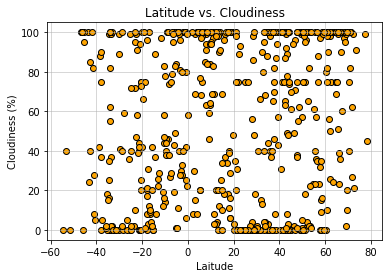

In [68]:
plt.scatter(weather_dict["Lat"], weather_dict["Cloudiness"], facecolor = "orange", edgecolor = "black")
plt.title("Latitude vs. Cloudiness")
plt.xlabel("Laitude")
plt.ylabel("Cloudiness (%)")
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)


plt.savefig("../Images/City Latitude vs Max Temperature.png")

## Latitude vs. Wind Speed Plot

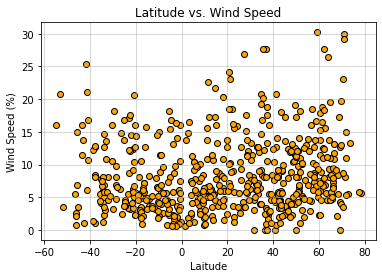

In [69]:
plt.scatter(weather_dict["Lat"], weather_dict["Wind Speed"], facecolor = "orange", edgecolor = "black")
plt.title("Latitude vs. Wind Speed")
plt.xlabel("Laitude")
plt.ylabel("Wind Speed (%)")
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)


plt.savefig("../Images/City Latitude vs Max Temperature.png")

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

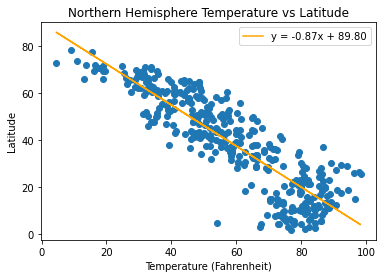

In [83]:
northern_hemi = weather_dict.loc[weather_dict["Lat"] >= 0]

data = st.linregress(northern_hemi["Max Temp"],northern_hemi["Lat"])

formula = data.slope * northern_hemi["Max Temp"] + data.intercept
plt.plot(northern_hemi["Max Temp"],formula, color='orange',label=f'y = {"{:.2f}".format(data.slope)}x + {"{:.2f}".format(data.intercept)}')

plt.scatter(northern_hemi["Max Temp"], northern_hemi["Lat"])
plt.title("Northern Hemisphere Temperature vs Latitude")
plt.xlabel("Temperature (Fahrenheit)")
plt.ylabel("Latitude")


plt.legend(loc="upper right")
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

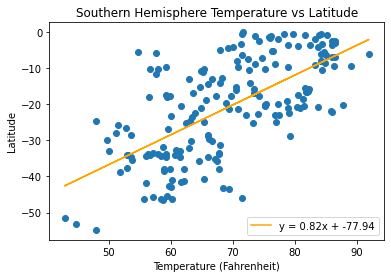

In [90]:
southern_hemi = weather_dict[weather_dict["Lat"] < 0]

data = st.linregress(southern_hemi["Max Temp"],southern_hemi["Lat"])

formula = data.slope * southern_hemi["Max Temp"] + data.intercept
plt.plot(southern_hemi["Max Temp"],formula, color='orange',label=f'y = {"{:.2f}".format(data.slope)}x + {"{:.2f}".format(data.intercept)}')

plt.scatter(southern_hemi["Max Temp"], southern_hemi["Lat"])
plt.title("Southern Hemisphere Temperature vs Latitude")
plt.xlabel("Temperature (Fahrenheit)")
plt.ylabel("Latitude")


plt.legend(loc="lower right")
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

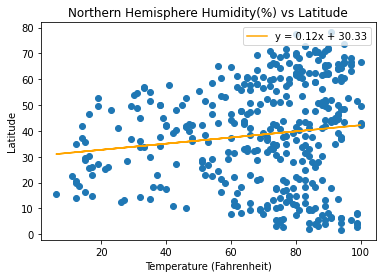

In [85]:
data = st.linregress(northern_hemi["Humidity"],northern_hemi["Lat"])

formula = data.slope * northern_hemi["Humidity"] + data.intercept
plt.plot(northern_hemi["Humidity"],formula, color='orange',label=f'y = {"{:.2f}".format(data.slope)}x + {"{:.2f}".format(data.intercept)}')

plt.scatter(northern_hemi["Humidity"], northern_hemi["Lat"])
plt.title("Northern Hemisphere Humidity(%) vs Latitude")
plt.xlabel("Temperature (Fahrenheit)")
plt.ylabel("Latitude")


plt.legend(loc="upper right")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

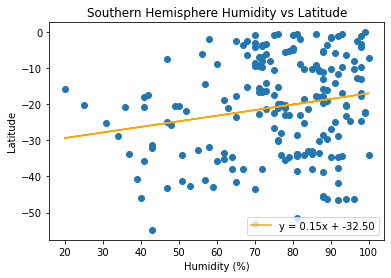

In [91]:
data = st.linregress(southern_hemi["Humidity"],southern_hemi["Lat"])

formula = data.slope * southern_hemi["Humidity"] + data.intercept
plt.plot(southern_hemi["Humidity"],formula, color='orange',label=f'y = {"{:.2f}".format(data.slope)}x + {"{:.2f}".format(data.intercept)}')

plt.scatter(southern_hemi["Humidity"], southern_hemi["Lat"])
plt.title("Southern Hemisphere Humidity vs Latitude")
plt.xlabel("Humidity (%)")
plt.ylabel("Latitude")


plt.legend(loc="lower right")
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

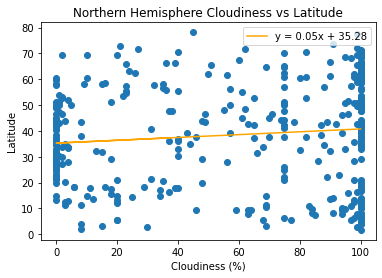

In [84]:
data = st.linregress(northern_hemi["Cloudiness"],northern_hemi["Lat"])

formula = data.slope * northern_hemi["Cloudiness"] + data.intercept
plt.plot(northern_hemi["Cloudiness"],formula, color='orange',label=f'y = {"{:.2f}".format(data.slope)}x + {"{:.2f}".format(data.intercept)}')

plt.scatter(northern_hemi["Cloudiness"], northern_hemi["Lat"])
plt.title("Northern Hemisphere Cloudiness vs Latitude")
plt.xlabel("Cloudiness (%)")
plt.ylabel("Latitude")


plt.legend(loc="upper right")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

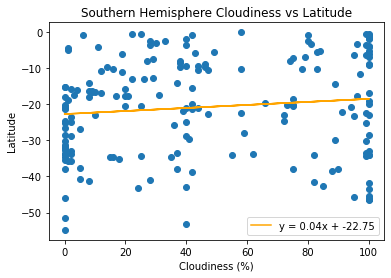

In [92]:
data = st.linregress(southern_hemi["Cloudiness"],southern_hemi["Lat"])

formula = data.slope * southern_hemi["Cloudiness"] + data.intercept
plt.plot(southern_hemi["Cloudiness"],formula, color='orange',label=f'y = {"{:.2f}".format(data.slope)}x + {"{:.2f}".format(data.intercept)}')

plt.scatter(southern_hemi["Cloudiness"], southern_hemi["Lat"])
plt.title("Southern Hemisphere Cloudiness vs Latitude")
plt.xlabel("Cloudiness (%)")
plt.ylabel("Latitude")


plt.legend(loc="lower right")
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

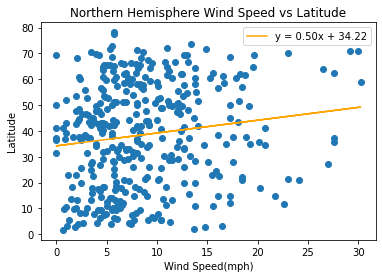

In [86]:
data = st.linregress(northern_hemi["Wind Speed"],northern_hemi["Lat"])

formula = data.slope * northern_hemi["Wind Speed"] + data.intercept
plt.plot(northern_hemi["Wind Speed"],formula, color='orange',label=f'y = {"{:.2f}".format(data.slope)}x + {"{:.2f}".format(data.intercept)}')

plt.scatter(northern_hemi["Wind Speed"], northern_hemi["Lat"])
plt.title("Northern Hemisphere Wind Speed vs Latitude")
plt.xlabel("Wind Speed(mph)")
plt.ylabel("Latitude")


plt.legend(loc="upper right")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

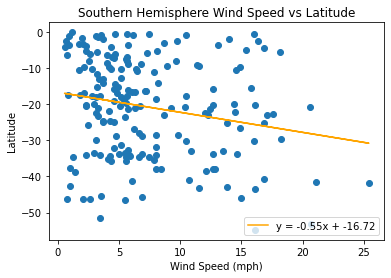

In [93]:
data = st.linregress(southern_hemi["Wind Speed"],southern_hemi["Lat"])

formula = data.slope * southern_hemi["Wind Speed"] + data.intercept
plt.plot(southern_hemi["Wind Speed"],formula, color='orange',label=f'y = {"{:.2f}".format(data.slope)}x + {"{:.2f}".format(data.intercept)}')

plt.scatter(southern_hemi["Wind Speed"], southern_hemi["Lat"])
plt.title("Southern Hemisphere Wind Speed vs Latitude")
plt.xlabel("Wind Speed (mph)")
plt.ylabel("Latitude")


plt.legend(loc="lower right")
plt.show()